In [1]:
# --- Import and analyse the data ingested from NWIS
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# 3569 river stations
# 3654 datapoints max per river
river_depth_df = pd.read_csv('ingested_data/river_depth_data.csv', index_col=0)
river_depth_df.index = pd.DatetimeIndex(river_depth_df.index)

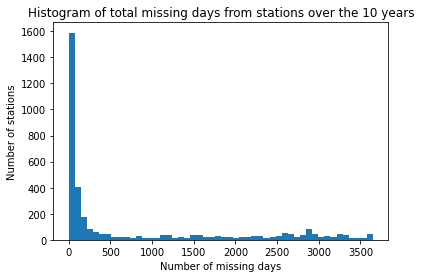

Number of river stations with perfect recording: 40
Number of river stations with 90% recordings: 2312


In [2]:
# --- Investigate how much data is missing from all the river stations
# --- Set threshold for % missing data to deem a station unusable (more than 10%)
non_nas = river_depth_df.count()
max_days = 3654
plt.hist(max_days-non_nas, bins=50)
plt.ylabel('Number of stations')
plt.xlabel('Number of missing days')
plt.title('Histogram of total missing days from stations over the 10 years')
plt.show()

print('Number of river stations with perfect recording:', sum(non_nas == max_days))
print('Number of river stations with 90% recordings:', sum(non_nas >= .9*max_days))

In [3]:
# --- Visualising location of these good rivers
good_rivers_bool = non_nas >= .9*max_days
good_river_sites = [river for good, river in zip(
    good_rivers_bool, list(river_depth_df)) if good]

# filter all recording sites to get only good river sites
# 1. get all sites + fix
df_raw_river_sites = pd.read_csv('input_data/recordingsites.tsv', sep='\t')
rec_sites_file = open('input_data/recordingsites.tsv')
lines = rec_sites_file.readlines()
df_raw_river_sites['site_no'] = [line.split('\t')[0] for line in lines[1:]]
rec_sites_file.close()
# 2. filter
filter_river_sites = [
    cand in good_river_sites for cand in df_raw_river_sites['site_no']]
df_raw_river_sites = df_raw_river_sites[filter_river_sites]

# Display on map
# https://plotly.com/python/scatter-plots-on-maps/
fig = px.scatter_geo(df_raw_river_sites,
                     lat='dec_lat_va',
                     lon='dec_long_va',
                     color="state_cd",  # which column to use to set the color of markers
                     hover_name="station_nm",  # column added to hover information
                     )
fig.show()


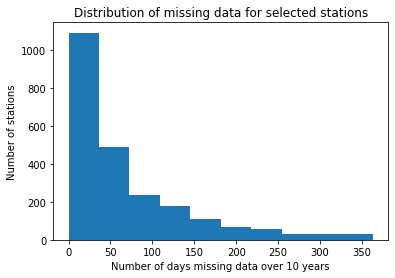

In [4]:
# --- Visualising quantity of missing data for selected stations
plt.hist(max_days-river_depth_df.loc[:, good_rivers_bool].count())
plt.ylabel('Number of stations')
plt.xlabel('Number of days missing data over 10 years')
plt.title('Distribution of missing data for selected stations')
plt.show()

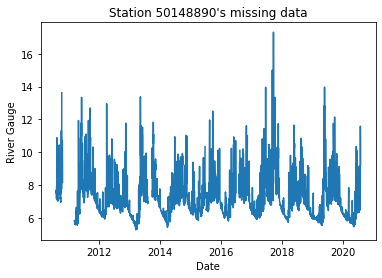

In [5]:
# --- Station 50148890 has 307 missing days - Where are they?
# Most missed days at the start
missing_days = max_days-river_depth_df.loc[:, good_rivers_bool].count()
# t
plt.plot(river_depth_df.index, river_depth_df['50148890'])
plt.ylabel('River Gauge')
plt.xlabel('Date')
plt.title('Station 50148890\'s missing data')
plt.show()

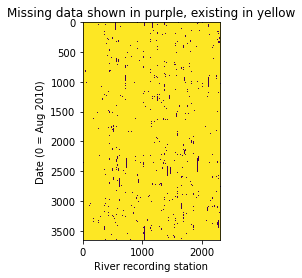

In [6]:
# --- Visualise missing data across all stations
dup_river_depth_df = river_depth_df.loc[:, good_rivers_bool].copy()
dup_river_depth_df = dup_river_depth_df.fillna(-1)
dup_river_depth_df[dup_river_depth_df != -1] = 1  # data exists = 1
dup_river_depth_df[dup_river_depth_df == -1] = 0  # missing data = 0

plt.imshow(dup_river_depth_df, interpolation='none')
plt.ylabel('Date (0 = Aug 2010)')
plt.xlabel('River recording station')
plt.title('Missing data shown in purple, existing in yellow')
plt.show()